<a href="https://colab.research.google.com/github/swlee123/Forage-British-Airways-VI/blob/main/Task_1_British_Airline_Forage_VI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Getting all the html

import requests

# making a request
# this is a website of 100 latest reviews on British Airway first class
r = requests.get("https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Afirst")

first_class = "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Afirst"
# business class 100
business_class = "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Abusiness"
# premium economy 100
premium_eco = "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Ap_economy"
# economy 100
eco_class = "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Aeconomy"


# check status code for respond
print(r)

# the content is in r.content


<Response [200]>


In [ ]:
from bs4 import BeautifulSoup

# the document

soup = BeautifulSoup(r.content,"html.parser")

# get comment inside strong tag

comments = []


s = soup.find_all('div', class_='text_content ')
comments.append(s)

print(s)

[<div class="text_content " itemprop="reviewBody">✅ <strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Trip Verified</em></a></strong> |  Paid £200 day before flight for an upgrade from economy to premium economy. At checkin they could not find my booking so a little wait while they rang someone who explains on the upgrade you get deleted from the system the checkin agent sees? Took about 5 minutes to resolve. Seat was nice enough. Stowage pocket in front a bit small. Food was reasonably nice. Shame that the bathroom is all the way back through economy and there is a bit of a queue. IFE system is good but selection mediocre. Worst part of the flight is that at CPT so we were on a remote stand and bussed in. Through passport control quickly but then it took an absolute age to get our luggage which ruined what would otherwise have been a reasonable flight. Upgrade was worth it at £200 maybe £300 (its a long flight) but their offers of £2000 or whatever for premium eco

In [ ]:
# Scrape from all 4 class

comments = [
]

class_link =[first_class,business_class,premium_eco,eco_class]

for link in class_link:
  r = requests.get(link)
  # the document

  soup = BeautifulSoup(r.content,"html.parser")

  # get comment inside strong tag
  s = soup.find_all('div', class_='text_content ')
  comments.append(s)

In [ ]:
comments

[[<div class="text_content " itemprop="reviewBody">✅ <strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Trip Verified</em></a></strong> |  Another BA Shambles. Started off well with excellent check in at first at t5, mid afternoon so avoided the early morning, evening scrum. Into the Concorde lounge, excellent service again. Great choice of cocktails, wine etc. Food ok a bit overcooked but pretty reasonable. Called to the boarding gate. Chaos, people jostling for position to get on the plane. People with children under 5 called before the 8 people in first bankrolling the flight and most of them well over 5. We get on to be told that none of the lights in first can be dimmed at all, so the lights were on all night. It was like being detained and interrogated! Excellent wine and champagne selection. Dinner menu handed out. I’ll have the prawn cocktail to start please. No you won’t as they’ve only loaded one for 8 people and the guy in 1A got it. I bet he felt like he

View the first comment scraped 

In [ ]:
comments[0]

Now we need to remove the html part in each comment 

In [ ]:
import re
# we will use the regex module to do such thing

regex = re.compile(r'<[^>]+>')

# a function to remove html part in the string
def remove_html_part(string):
  return regex.sub('', string)


In [ ]:
# Tryining the parsing function on the first comment
original_text = str(s[0])

# Remove 
new_text = remove_html_part(original_text)

# a list to remove the weird words 
remove_list = ["✅ Trip Verified |","Not Verified |"]
for kw in remove_list:
  new_text = new_text.replace(kw,"")

# print the parsed text
print(f"The parsed text :\n{new_text}")

The parsed text :
  Absolutely terrible experience with British Airways. After a short flight from London Heathrow to Frankfurt, they couldn't get my suitcase to me in time for my next flight (on Cathay Pacific) to Melbourne, despite a 3 hour gap between the two flights. Told me they would arrange for the suitcase to be transferred directly to Melbourne - instead, it got to Hong Kong and left there. When they finally tracked it down, they sent it back to London. All happened over Christmas, so very stressful yet minimal communication from their team. While the plane crew may be lovely, the service outside of this has been nothing short of dreadful, and if given the option, I will avoid flying with them in future.


In [ ]:
# process all the commend into pure text
processed_comment =  []

for flight_class in comments:
  for comment in flight_class:
    comment = str(comment)
    comment = remove_html_part(comment)
    # a list to remove the weird words 
    remove_list = ["✅ Trip Verified |","Not Verified |","✅ Verified Review |"]
    for kw in remove_list:
      comment = comment.replace(kw,"")
    # append to new list
    processed_comment.append(comment)

In [ ]:
len(processed_comment) # number of comments

400

In [ ]:
processed_comment[345]

"  Reasonably smooth boarding. Meal service was smooth ad efficient but no ice or spirits available as no room on the trolley - could they have offered to serve this afterwards? Seat was very uncomfortable indeed on this aircraft so got little if any sleep on the long overnight flight. Cabin crew spent much of the time between meals talking loudly at the rear galley meaning we couldn't sleep even if the seats were comfortable. This was so disrespectful and inconsiderate."

## AFINN

AFINN is an English word listed developed by Finn Årup Nielsen. Words scores range from minus five (negative) to plus five (positive). The English language dictionary consists of 2,477 coded words.

I will use AFINN to help me do sentiment analysis on the comment on British airlines

In [ ]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=690dd8cb84158e666b7042aaeb02a5be4217520bc89379c300504e8f6bb9bd65
  Stored in directory: /root/.cache/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [ ]:
from afinn import Afinn

In [ ]:
afinn = Afinn(language='en')

In [ ]:
score_comment = []

for comment in processed_comment:
  score_comment.append(afinn.score(comment))


In [ ]:
score_comment[:20]

[14.0,
 0.0,
 17.0,
 1.0,
 1.0,
 -9.0,
 8.0,
 4.0,
 25.0,
 11.0,
 26.0,
 19.0,
 31.0,
 11.0,
 9.0,
 -12.0,
 -1.0,
 -22.0,
 3.0,
 27.0]

Turns out some of the comment is negative but AFINN gives a positive score, next we will try out with VADER

## VADER
VADER provide more details on the sentiment of the comment which it will return probability of negative,positive and neutral score of a comment

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.4 MB/s 


Code example of VADER library

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    #note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
    #from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

## Using VADER to analyse the sentiment of comments of British Airlines

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

vader_compound_score = []
for comment in processed_comment:
  score = analyzer.polarity_scores(comment)
  vader_compound_score.append(score["compound"])
  print(f"{comment}\n {str(score)} ")

  Another BA Shambles. Started off well with excellent check in at first at t5, mid afternoon so avoided the early morning, evening scrum. Into the Concorde lounge, excellent service again. Great choice of cocktails, wine etc. Food ok a bit overcooked but pretty reasonable. Called to the boarding gate. Chaos, people jostling for position to get on the plane. People with children under 5 called before the 8 people in first bankrolling the flight and most of them well over 5. We get on to be told that none of the lights in first can be dimmed at all, so the lights were on all night. It was like being detained and interrogated! Excellent wine and champagne selection. Dinner menu handed out. I’ll have the prawn cocktail to start please. No you won’t as they’ve only loaded one for 8 people and the guy in 1A got it. I bet he felt like he’d won the lottery. Ok I’ll have the beef wellington, basically a freezing slice of beef with some lettuce. Mains,  I’ll have the curry, no you won’t as they

In [ ]:
vader_compound_score[:20]

[0.9304,
 0.458,
 0.9814,
 -0.7666,
 0.2263,
 -0.9646,
 0.935,
 0.9367,
 0.9853,
 0.8748,
 0.9911,
 0.8641,
 0.9945,
 0.8979,
 0.0238,
 -0.9377,
 -0.1168,
 -0.9703,
 -0.3816,
 0.9366]

In [ ]:
len(vader_compound_score)

400

## VADER Scoring
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

For the case of British Airline, I set compound score of 

- `>0.75` as `positive`
- `<0.5` and `<0.75` as `neutral`
- `>0.0`and`<0.5` as `negative`
- `<0.0` as `highly_negative`


In [ ]:
sentiment = []
for score in vader_compound_score:
  if score>0.75:
    sentiment.append("positive")
  elif (0.5<=score<=0.75):
    sentiment.append("neutral")
  elif 0.0<=score<0.5:
    sentiment.append("negative")
  elif score<0.0:
    sentiment.append("very_negative")

In [ ]:
sentiment[:20]

['positive',
 'negative',
 'positive',
 'very_negative',
 'negative',
 'very_negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'very_negative',
 'very_negative',
 'very_negative',
 'very_negative',
 'positive']

In [ ]:
sentiment.count("positive")

164

In [ ]:
sentiment.count("very_negative")

175

In [ ]:
sentiment.count("negative")

33

In [ ]:
sentiment.count("neutral")

28

In [ ]:
## Function to find random comment and it's vander score

import random
import textwrap

def visualize_comment():
  random_no = random.randint(0,len(processed_comment))
  print(f"Comment {random_no+1}")
  print(textwrap.fill(processed_comment[random_no],70))
  print(f"\nVader score : {vader_compound_score[random_no]}")
  print(f"Sentiment : {sentiment[random_no]}")

In [ ]:
# can repeat running this cell to see some comments, check the comments and scores and adjust the scoring 
visualize_comment()

Comment 98
  London Heathrow - New York JFK, BA115, First seat 1K. It was very
strange to be bussed to the aircraft rather than using an airbridge,
but this was due to capacity issues. I was greeted at the steps of the
aircraft, taken to my seat, handed pyjamas and a wash bag and a glass
of champagne. The seat was the new First with upgraded Panasonic
entertainment system, I was addressed by name throughout the flight,
given extra food to try as it was a half full cabin, regular top ups
for drinks, and received a stellar service from a dedicated and
professional crew. The new entertainment system was great and the buy
for you fly service worked as my items were delivered to my seat. One
of the best flights I've had for a long time, but I always believe
it's down to the service.

Vader score : 0.9848
Sentiment : positive


## Visualize vander's data

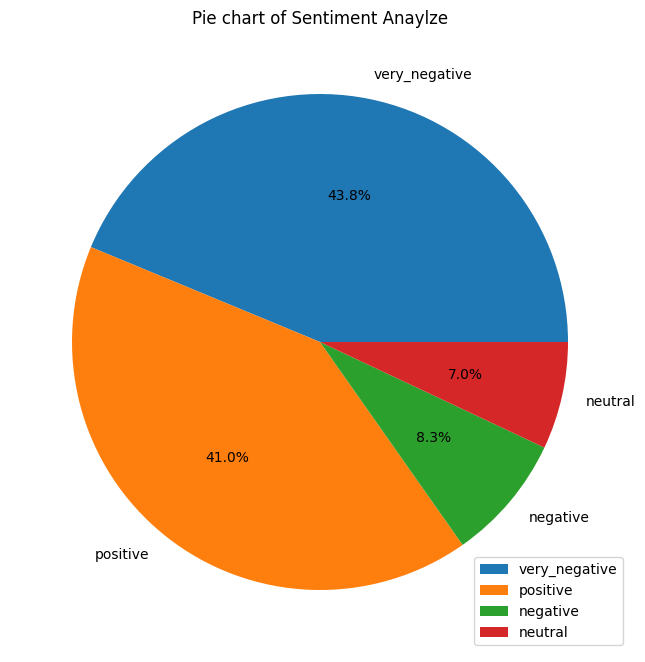

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# using pie chart to visualize

y = np.array([sentiment.count("very_negative"),sentiment.count("positive"),sentiment.count("negative"),sentiment.count("neutral")])
labels = ["very_negative","positive","negative","neutral"]

plt.figure(figsize=(8,15))
plt.pie(y, labels = labels,autopct='%.1f%%')
plt.title("Pie chart of Sentiment Anaylze")
plt.legend()
plt.show() 

In [ ]:
x = np.arange(len(processed_comment))
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# line chart
# not very suitable
vader_compound_score[:20]

plt.figure(figsize=(17,10))
plt.plot(x,vader_compound_score)
plt.ylabel("Vader Sentiment Score")
plt.xlabel("Comments")
plt.title("Line Diagram of Sentiment Score")


In [ ]:
labels = np.arange(start=-1,stop=1,step=0.1)
labels

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

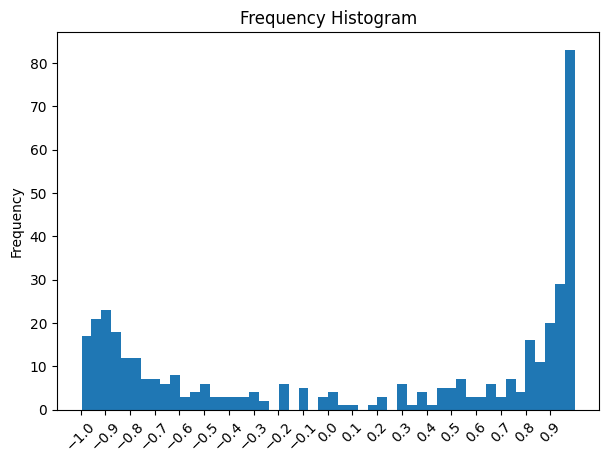

In [ ]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
labels = np.arange(start=-1.0,stop=1.0,step=0.1)
plt.hist(vader_compound_score, bins=50)
plt.xticks(labels,rotation=45)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
x1 = [score for score in vader_compound_score if score>0.75] # positive
x2 = [score for score in vader_compound_score if 0.0<=score<0.5] # negative
x3 = [score for score in vader_compound_score if 0.5<=score<=0.75] # neutral
x4 = [score for score in vader_compound_score if score<0.0] # very_negative

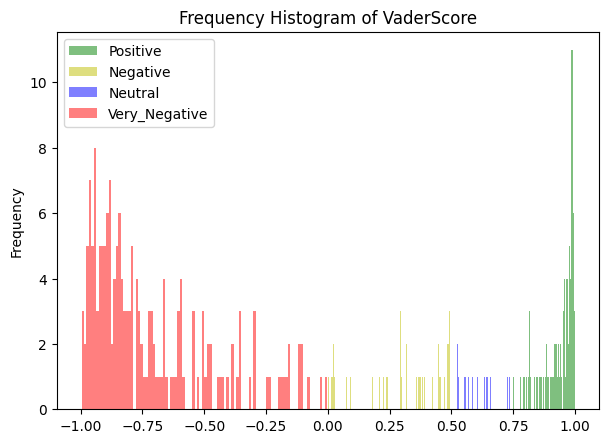

In [ ]:

kwargs = dict(alpha=0.5, bins=100)

bins = 100
plt.hist(x1, **kwargs, color='g', label='Positive')
plt.hist(x2, **kwargs, color='y', label='Negative')
plt.hist(x3, **kwargs, color='b', label='Neutral')
plt.hist(x4, **kwargs, color='r', label='Very_Negative')
plt.gca().set(title='Frequency Histogram of VaderScore', ylabel='Frequency')

plt.axis('tight')

plt.legend();

## Wordcloud
Finding some frequent word in comments

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# append all comment in one commend_words string
commend_words = ""

for c in processed_comment:
  commend_words+=c

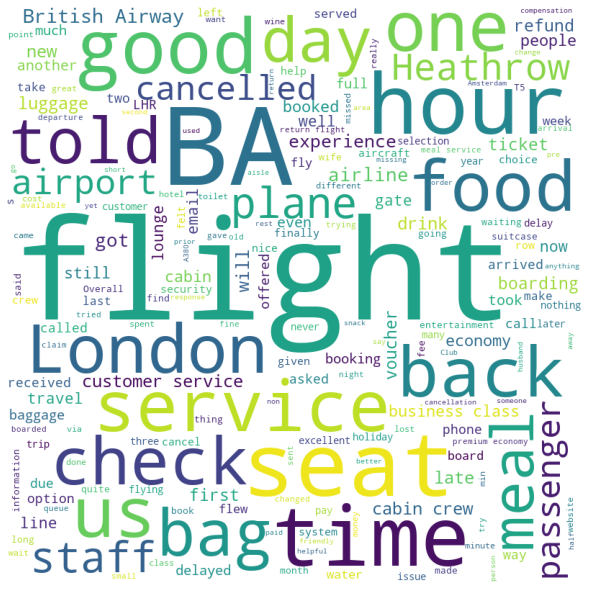

In [ ]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(commend_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()